In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("E:/Dataset/archive/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
duplicated_rows = df.duplicated()
df[duplicated_rows]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [4]:
df.query("person_age == 23 & person_income == 42000 & person_home_ownership == 'RENT' & loan_amnt == 6000")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
6556,23,42000,RENT,1.0,HOMEIMPROVEMENT,C,6000,12.99,1,0.14,N,4
6574,23,42000,RENT,3.0,DEBTCONSOLIDATION,D,6000,14.42,1,0.14,N,4
6576,23,42000,RENT,2.0,PERSONAL,C,6000,12.41,1,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [5]:
df_dups_free = df.drop_duplicates()
df_dups_free

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [6]:
for cols in df_dups_free:
    print(cols, '------>', df_dups_free[cols].nunique())
    if df_dups_free[cols].nunique() < 20:
        print("\n")
        print(df_dups_free[cols].value_counts(normalize=True) * 100)
    print("\n")

person_age ------> 58


person_income ------> 4295


person_home_ownership ------> 4


RENT        50.524432
MORTGAGE    41.241979
OWN          7.906589
OTHER        0.326999
Name: person_home_ownership, dtype: float64


person_emp_length ------> 36


loan_intent ------> 6


EDUCATION            19.777270
MEDICAL              18.638944
VENTURE              17.528381
PERSONAL             16.960760
DEBTCONSOLIDATION    16.007527
HOMEIMPROVEMENT      11.087117
Name: loan_intent, dtype: float64


loan_grade ------> 7


A    33.017646
B    32.042818
C    19.860563
D    11.167325
E     2.970755
F     0.743460
G     0.197433
Name: loan_grade, dtype: float64


loan_amnt ------> 753


loan_int_rate ------> 348


loan_status ------> 2


0    78.13117
1    21.86883
Name: loan_status, dtype: float64


loan_percent_income ------> 77


cb_person_default_on_file ------> 2


N    82.323544
Y    17.676456
Name: cb_person_default_on_file, dtype: float64


cb_person_cred_hist_length ------> 29




In [7]:
df_dups_free.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


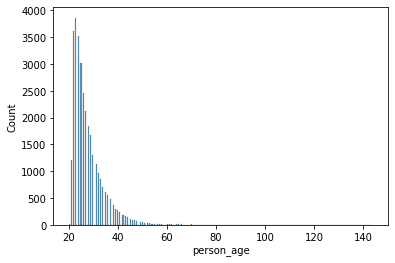

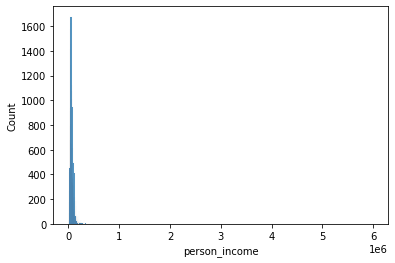

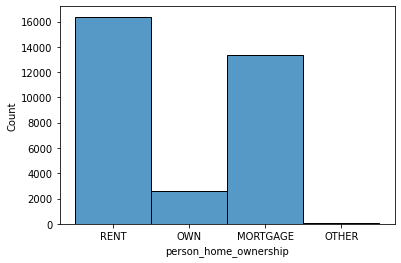

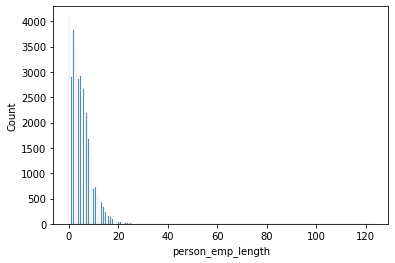

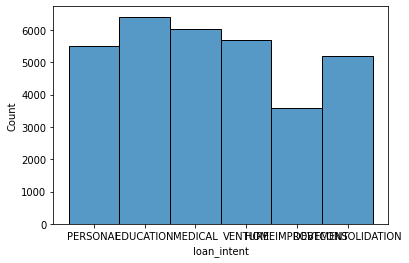

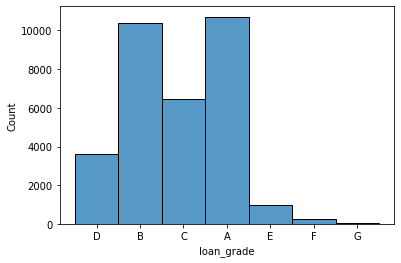

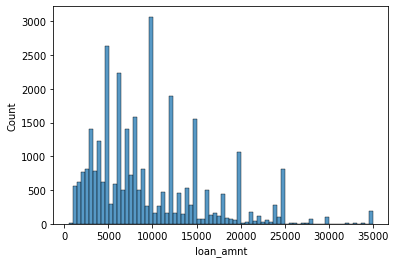

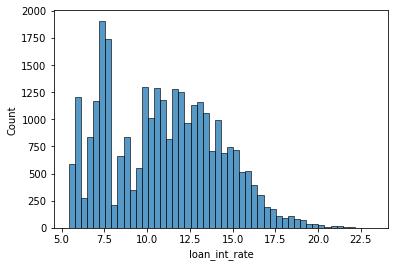

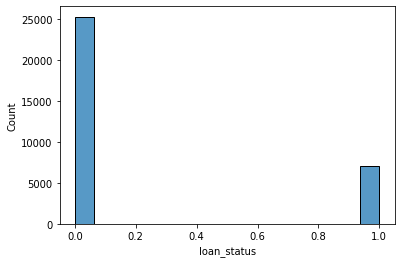

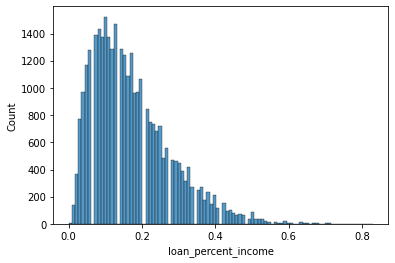

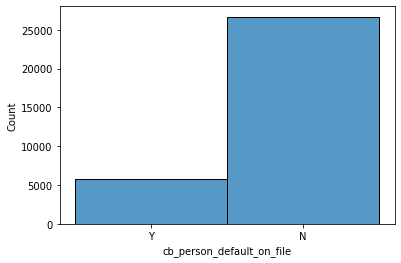

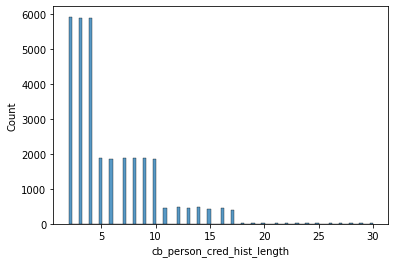

In [8]:
for cols in df_dups_free:
    sns.histplot(df_dups_free[cols])
    plt.show()

In [9]:
age_bard = df_dups_free.loc[df_dups_free['person_age'] > 80]

In [10]:
age_bard

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [11]:
df_alg = df_dups_free.loc[df_dups_free['person_age'] < 80]

In [12]:
df_alg = df_alg.loc[(df_alg['person_emp_length'] <= 66) | (df_alg['person_emp_length'].isna()), :]
df_alg = df_alg.drop('loan_int_rate', axis=1)


In [13]:
df_alg

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,0,0.10,N,26


In [14]:
df_alg.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32406.000000,3.240600e+04,31519.000000,32406.000000,32406.000000,32406.000000,32406.000000
mean,27.725360,6.589474e+04,4.782988,9592.655681,0.218725,0.170249,5.809387
std,6.185114,5.251954e+04,4.037429,6321.134922,0.413388,0.106787,4.053719
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,0.000000,0.230000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,1.000000,0.830000,30.000000


In [15]:
cat_cols = [col for col in df_alg if df_alg[col].dtypes == 'object']
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [16]:
num_cols = [col for col in df_alg if df_alg[col].dtypes != "object"]
num_cols.remove('loan_status')

In [17]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [18]:
np = Pipeline([
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler()),
])

In [19]:
preprocessor = ColumnTransformer(transformers=[
    ('num', np, num_cols),
    ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [20]:
models = [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]

In [69]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth':[5, 9, 13],
        'model__min_samples_split':[4,6,8],
        'preprocess__num__imputer__estimator': models
    },
#     LGBMClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
#     {
#         'model__n_estimators': [100, 300, 400],
#         'preprocess__num__imputer__estimator': models,
#         'model__learning_rate': [0.001, 0.01, 0.1, 1],
#         'model__boosting_type': ['gbdt', 'goss', 'dart'],
#     },  
#     SVC(class_weight='balanced', random_state=0, kernel='rbf', C = 0.025, probability=True):
#     {
#         'preprocess__num__imputer__estimator': models,
#     },
#     DecisionTreeClassifier(class_weight='balanced', random_state=0):
#     {
#         'model__n_estimators': [100, 300, 400],
#         'preprocess__num__imputer__estimator': models
#     }
    
}

In [70]:
for clf, param in grid.items():
    print(clf)
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [100, 200, 300], 'model__max_depth': [5, 9, 13], 'model__min_samples_split': [4, 6, 8], 'preprocess__num__imputer__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_alg.drop('loan_status', axis=1), df_alg['loan_status'], random_state=0, test_size=0.3, stratify=df_alg['loan_status'], shuffle=True)

In [72]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_cred_hist_length
count,22684.000000,2.268400e+04,22054.000000,22684.000000,22684.000000,22684.000000
mean,27.671310,6.557508e+04,4.779813,9565.292717,0.170356,5.785972
std,6.157678,5.183545e+04,4.069192,6317.930073,0.106848,4.021456
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.150000,4.000000
75%,30.000000,7.890275e+04,7.000000,12000.000000,0.230000,8.000000
max,78.000000,2.039784e+06,41.000000,35000.000000,0.830000,30.000000


In [73]:
y_train.describe()

count    22684.000000
mean         0.218744
std          0.413404
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [74]:
full_df = pd.DataFrame()
best_algs = {}

for clf, param in grid.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', clf)
    ])
    # print(pipe.get_params().keys())
    
    rand_search = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy', n_jobs=-1,
                                    verbose=1, n_iter=4, random_state=0)
    rand_search.fit(X_train, y_train)
    result = pd.DataFrame(rand_search.cv_results_)
    
    temp_data = result.loc[:, ['params', 'mean_test_score']]
    alg_name = str(clf).split('(')[0]
    temp_data['alg_name'] = alg_name
    
    full_df = pd.concat([full_df, temp_data], ignore_index=True)
    best_algs[alg_name] = rand_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [76]:
np.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'imputer', 'scaler', 'imputer__add_indicator', 'imputer__estimator', 'imputer__imputation_order', 'imputer__initial_strategy', 'imputer__max_iter', 'imputer__max_value', 'imputer__min_value', 'imputer__missing_values', 'imputer__n_nearest_features', 'imputer__random_state', 'imputer__sample_posterior', 'imputer__skip_complete', 'imputer__tol', 'imputer__verbose', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std'])

In [77]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,alg_name
2,{'preprocess__num__imputer__estimator': Random...,0.928584,RandomForestClassifier
1,{'preprocess__num__imputer__estimator': Linear...,0.909628,RandomForestClassifier
0,{'preprocess__num__imputer__estimator': Random...,0.879475,RandomForestClassifier
3,{'preprocess__num__imputer__estimator': Random...,0.879078,RandomForestClassifier


In [78]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0, 0]

{'preprocess__num__imputer__estimator': RandomForestRegressor(random_state=0),
 'model__n_estimators': 300,
 'model__min_samples_split': 4,
 'model__max_depth': 13}

In [79]:
b_model = best_algs['RandomForestClassifier']
b_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                

In [80]:
b_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                

In [81]:
preds = b_model.predict(X_test)

In [82]:
confusion_matrix(y_test, preds)

array([[7483,  113],
       [ 592, 1534]], dtype=int64)

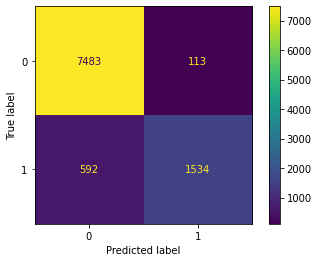

In [83]:
plot_confusion_matrix(b_model, X_test, y_test)

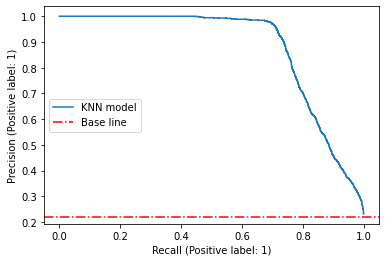

In [84]:
plot_precision_recall_curve(b_model, X=X_test, y=y_test, label="KNN model")
baseline = y_test.sum() / len(y_test)
plt.axhline(baseline, color='r', ls='-.', label="Base line ")
plt.legend(loc='best')

In [85]:
print(classification_report(y_true=y_test, y_pred=preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7596
           1       0.93      0.72      0.81      2126

    accuracy                           0.93      9722
   macro avg       0.93      0.85      0.88      9722
weighted avg       0.93      0.93      0.92      9722



In [86]:
a, b, c = learning_curve(b_model, X_train, y_train, n_jobs=-1, scoring='accuracy')

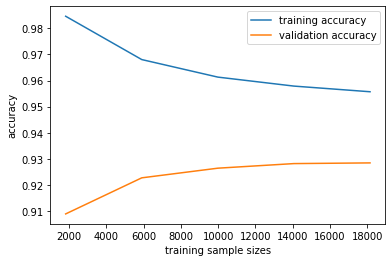

In [87]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()